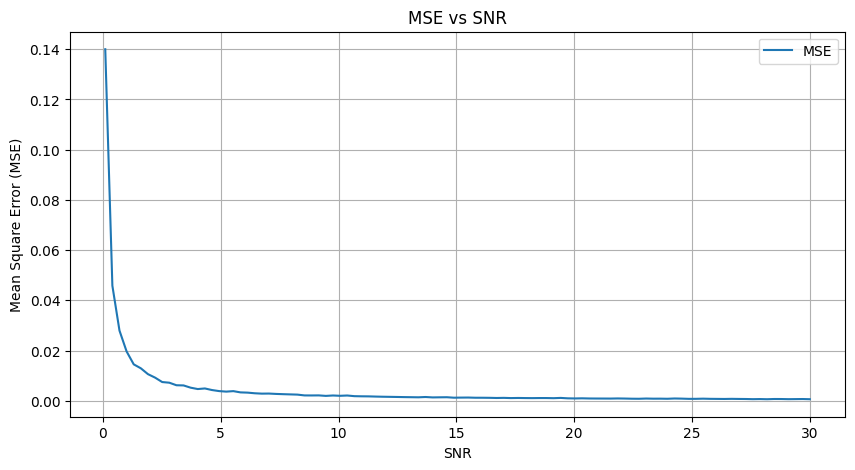

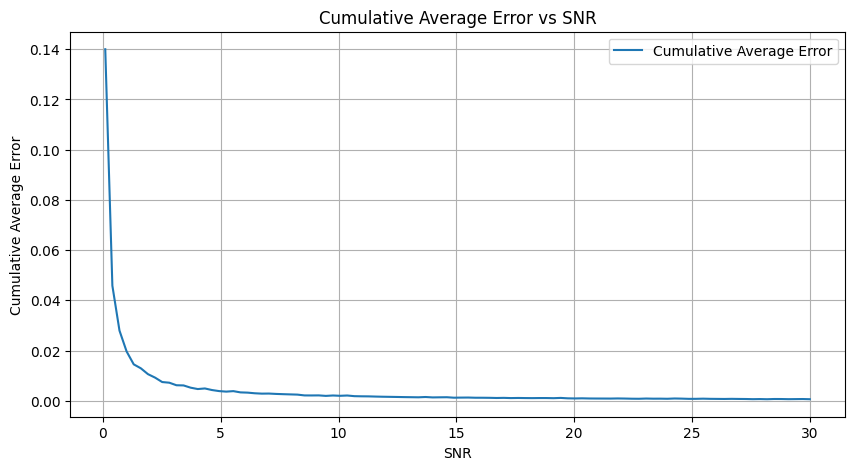

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma_A = 1
mu_A = 5 
snr_values = np.linspace(0.1, 30, 100)
num_iterations = 1000
num_samples = 50

sigma_noise_values = sigma_A / np.sqrt(snr_values)

mse_values = []
cumulative_errors = []

for sigma_noise in sigma_noise_values:
    A = np.random.normal(mu_A, sigma_A)
    mse = 0
    cumulative_error = 0
    
    for it in range(num_iterations):
        W = np.random.normal(0, sigma_noise, num_samples)
        X = A + W  # Generate observed samples
        
        A_hat = mu_A + (sigma_A**2 / (sigma_A**2 + (sigma_noise**2 / num_samples))) * (np.mean(X) - mu_A)
        
        error = (A - A_hat) ** 2  # Squared error
        mse += error
        cumulative_error += error
    
    mse /= num_iterations
    cumulative_error /= num_iterations
    
    mse_values.append(mse)
    cumulative_errors.append(cumulative_error)

# Plot MSE vs SNR
plt.figure(figsize=(10, 5))
plt.plot(snr_values, mse_values, label='MSE')
plt.xlabel('SNR')
plt.ylabel('Mean Square Error (MSE)')
plt.title('MSE vs SNR')
plt.grid(True)
plt.legend()
plt.show()

# Plot Cumulative Average Error vs SNR
plt.figure(figsize=(10, 5))
plt.plot(snr_values, cumulative_errors, label='Cumulative Average Error')
plt.xlabel('SNR')
plt.ylabel('Cumulative Average Error')
plt.title('Cumulative Average Error vs SNR')
plt.grid(True)
plt.legend()
plt.show()